<h1>Multi-class Logistic Regression</h1>
<h3>Loading the data</h3>

In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
from scipy.io import loadmat
import scipy.optimize as opt

%matplotlib inline

In [2]:
#using load mat to load the matlab files in 
data = loadmat("ex3data1.mat")

X = data['X']
y = data['y']

<h3>Visualizing subset of the training set</h3>

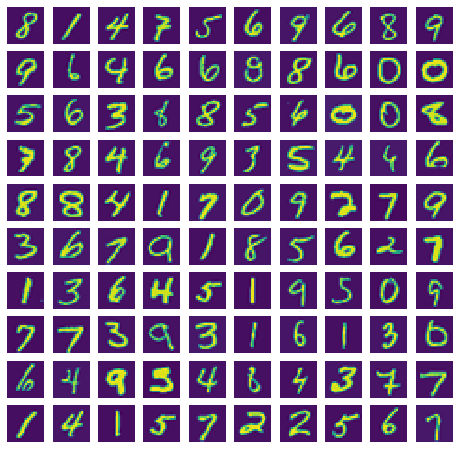

In [3]:
import matplotlib.image as mpimg
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"))
        
        axis[i,j].axis("off")

<h3>Adding the intercept term</h3>

In [4]:
m = len(y)
ones = np.ones((m,1)) # an array of size 5000 x 1
X = np.hstack((ones,X)) #intercept
(m,n) = X.shape

In [5]:
def sigmoid(z): 
    return 1/(1+np.exp(-z))

<h3>Implementing the vectorized cost and vectorized gradient function</h3>

In [6]:
def costFunctionReg(theta, X, y, lmbda):
    m = len(y)
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
    temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))))
    cost = (1/-m)*np.sum(temp1 + temp2)
    return cost +  lmbda / (2*m) * np.sum(theta[1:]**2) 

In [7]:
def gradRegularization(theta, X, y, lmbda):
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda /m
    
    return temp

<h3>Optimizing parameters</h3>

Since we have 10 different models, we need to find the optimal parameters for each model, this is why we use the for loop

In [ ]:
lmbda = 0.1
theta = np.zeros((10,n)) # initial parameters

for i in range(10):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i],  fprime = gradRegularization, args = (X, (y == digit_class).flatten(), lmbda), maxiter = 50)

         Current function value: 0.009110
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182


<h3>Making predictions using the One-vs-all Technique</h3>

Compute the "probability' that it belongs to each class using the trained logistic regression classifiers. Return the prediction vector to find the model accuracy.

In [ ]:
pred = np.argmax(X @ theta.T, axis = 1)
pred = [i if i else 10 for i in pred]
np.mean(pred == y.flatten())*100